In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh
import matplotlib.pyplot as plt
import os, sys, pathlib
import numpy as np
import xarray as xr
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))
sys.path.append(os.path.join(r'/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions/source_functions.py'))

from convergence_functions import *
from plotting_functions import *
from source_functions import *

from matplotlib.ticker import LogFormatter

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2




# Area calculation


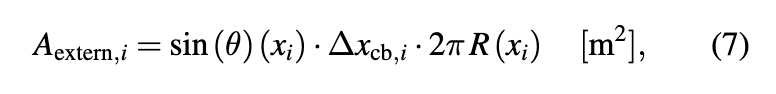


### Need to remember to implement proper R values

In [3]:
slow_pump = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_9/steady_state_density_source/slow_pump_0.1/case_01_transient_test')

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

Text(0, 0.5, 'Area (m^2)')

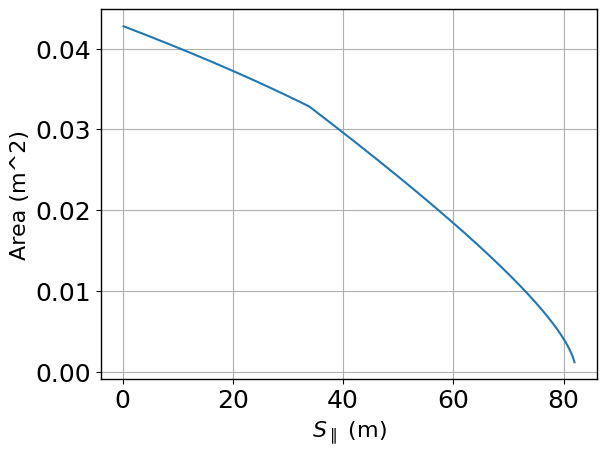

In [4]:
xpoint_location = slow_pump.options['mesh']['length_xpt']


y = slow_pump['y'].values

x_point_index = np.argmin(np.abs(y - xpoint_location))

y_trim = y[x_point_index:]


theta_upstream = np.zeros(len(y[:x_point_index])) + 0.01
theta_downstream = np.linspace(0.01, 0.005, len(y[x_point_index:]))

theta = np.append(theta_upstream, theta_downstream)
print(theta)




delta_x = np.squeeze(slow_pump['dy'].values)

R = 1.75

# baffle_location = slow_pump.options['d']['baffle_position']

# baffle_index = np.argmin(np.abs(y - baffle_location))

# y_baffle = y[baffle_index:]
# delta_x_baffle = np.squeeze(slow_pump['dy'].values)[baffle_index:]
# theta_baffle = theta = np.linspace(0.01, 0.005, len(y_baffle))

def calculate_area(sin_theta, delta_x, R):


    A = sin_theta * delta_x * 2*np.pi * R
    return A


A = calculate_area(theta, delta_x, R)


# A_baffle = calculate_area(theta_baffle, delta_x_baffle, R)

# plt.plot(y_baffle, A_baffle)

plt.plot(y, A)
plt.xlabel(r'$S_{\parallel}$ (m)')
plt.ylabel(r'Area (m^2)')


straight_line_params: A = -0.00052606412936023, B = 0.04823050207901587


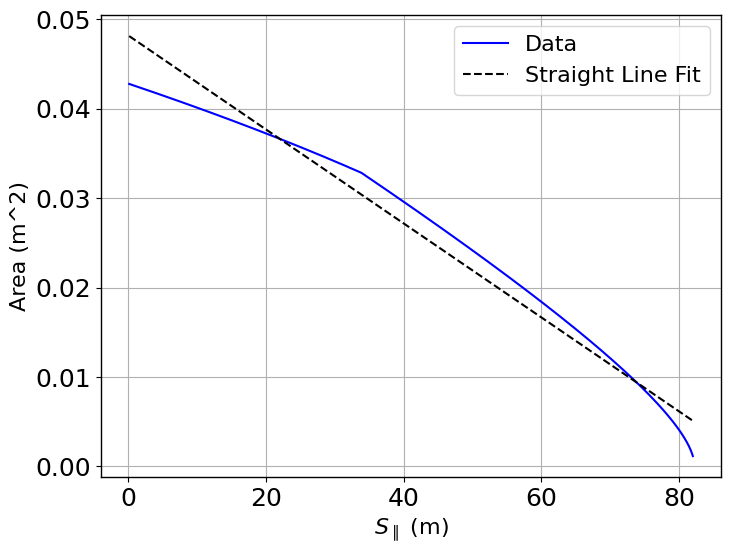

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x_data = y
y_data = A  


def exponential_decay(x, A, B, C):
    return A * np.exp(-B * x) + C

def straight_line(x, A, B):
    return A * x + B


def logarithmic_decay(x, A, B):
    return A * np.log(x) + B


straight_line_params, _ = curve_fit(straight_line, x_data, y_data, p0=(0.03, 0), maxfev=5000)
exp_params, _ = curve_fit(exponential_decay, x_data, y_data, p0=(0.03, 0.01, 0), maxfev=5000)

log_params, _ = curve_fit(logarithmic_decay, x_data, y_data, p0=(0.01, 0), maxfev=5000)


y_straight_line_fit = straight_line(x_data, *straight_line_params)
y_exp_fit = exponential_decay(x_data, *exp_params)

y_log_fit = logarithmic_decay(x_data, *log_params)


print(f'straight_line_params: A = {straight_line_params[0]}, B = {straight_line_params[1]}')

# Plot data and fits
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'b-', label="Data")
plt.plot(x_data, y_straight_line_fit, 'k--', label="Straight Line Fit")
plt.xlabel(r"$S_\parallel$ (m)")
plt.ylabel("Area (m^2)")
plt.legend()
plt.show()

# A = -0.00052606412936023 * y + 0.04823050207901587


In [6]:
area_refactor = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/area_refactor/base_00xxx_get_steady_state_with_res')

In [7]:
y = area_refactor['y'].values
area = area_refactor['area_d'].values

# Tom Body pump/scen dev

In [8]:
tb =  xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/Stable_case_dev/case_04_apply_ion_flux_limiter')

tb_5_neon = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/Stable_case_dev/tb_case_single_proc_increase_neon/5_e-2_neon_40_cores')


In [9]:
for var_name, data_array in tb.data_vars.items():
    print(f"Variable: {var_name}")
    print(data_array)
    print("\n")  # Add a new line for better readability
    
    # print(f"Dimensions: {data_array.dims}")
    # print(f"Coordinates: {list(data_array.coords)}")
    # print(f"Attributes: {data_array.attrs}")
    # print("\n")  # Add a new line for better readability

Variable: Bxy
<xarray.DataArray 'Bxy' (x: 1, y: 400)>
dask.array<concatenate, shape=(1, 400), dtype=float64, chunksize=(1, 10), chunktype=numpy.ndarray>
Coordinates:
    dx       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dy       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dz       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
  * x        (x) int64 0
  * y        (y) float64 0.1945 0.5831 0.9708 1.357 ... 81.92 81.95 81.97 81.99
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    metadata:       {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.51425755...
    options:        IncIntShear = false\t\t# type: bool, source: default\nMXG...
    geometry:       


Variable: Ed+_sheath
<xarray.DataArray 'Ed+_sheath' (t: 501, x: 1, y: 400, z: 1)>
dask.array<mul, shape=(501, 1, 400, 1), dtype=float64, chunksize=(501, 1, 10, 1), chunktype=numpy.ndarra

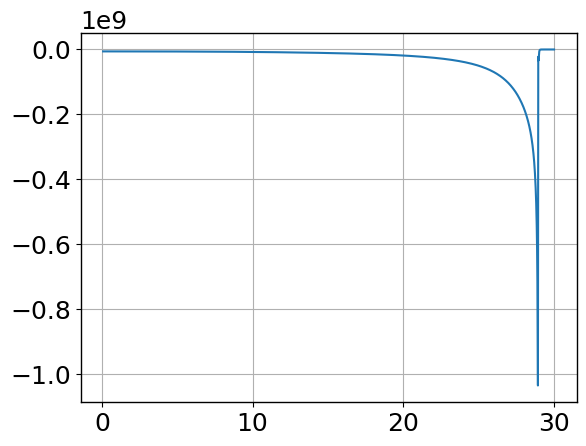

In [10]:
ds = tb_5_neon.isel(t=-1)
y = ds['y'].values[1:-1]
Rneon = replace_guards(np.squeeze(ds['Rfixed_fraction_neon']))

plt.plot(y, Rneon)

In [11]:
def plot_time_slices(simulation_data, variables=['Te'], data_label=None,
                  guard_replace=True, linestyles=None, log_threshold=1e6, 
                  time_slices=(-5, None), save=False):
    """
    Plots specified variable profiles for multiple time slices in the given simulation data.

    Parameters:
    simulation_data (xarray Dataset): Dataset for the simulation.
    variables (list): List of variables to plot (e.g., ['Te', 'Ti']).
    data_label (str, optional): Label for the dataset in the plot legend.
    guard_replace (bool): Whether to replace guard cells.
    linestyles (list, optional): Custom linestyles for each variable plot.
    log_threshold (float): Threshold above which the y-axis will be plotted in log scale.
    time_slices (tuple): Range of time slices to plot (e.g., (-40, None) for last 40 slices).
    save (bool): Whether to save the plot as an image file.
    
    Returns:
    list of Axes: List of matplotlib Axes objects for further manipulation.
    """
    time_data = simulation_data["t"].values
    selected_slices = np.arange(*time_slices) if time_slices[1] else np.arange(time_slices[0], len(time_data))
    num_vars = len(variables)

    # Set up plot layout with two columns, adjusting rows based on the number of variables
    ncols = 2 if num_vars > 1 else 1
    nrows = (num_vars + 1) // 2  # Ensure enough rows

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6 * nrows), dpi=500)
    
    # If we have only one subplot, axs won't be a list, so we ensure it's treated as such
    if num_vars == 1:
        axs = [axs]

    # Flatten axs in case of multiple rows and columns, to handle indexing uniformly
    axs = np.ravel(axs)

    if linestyles is None:
        linestyles = ['-'] * len(selected_slices)  # Default linestyle for each time slice

    for i, var in enumerate(variables):
        ax = axs[i]

        y = simulation_data["y"].values
        for j, t in enumerate(selected_slices):
            time_slice_data = simulation_data.isel(t=t)
            var_data = np.ravel(time_slice_data[var].values)

            if guard_replace:
                y = y[1:-1]
                var_data = replace_guards(var_data)

            label = f'{var} (t={time_data[t]:.2f}s)'
            ax.plot(y, var_data, label=label, linestyle=linestyles[j % len(linestyles)])

        # Determine if log scale is needed based on threshold
        if np.max(np.abs(var_data)) > log_threshold:
            scale = "log"
        else:
            scale = "linear"

        # Set the appropriate scale
        ax.set_yscale(scale)
        if scale == "log":
            ax.yaxis.set_major_formatter(log_formatter())  # Apply log formatting

        # Get units
        units = simulation_data[var].attrs.get('units', 'Unknown units')

        ax.set_xlabel(r'S$_\parallel$ (m)')
        ax.set_ylabel(f'{var} ({units})')
        ax.legend(loc='best', fontsize=8)
        ax.grid(True)

    # Hide any unused axes (if num_vars is odd)
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()

    if save:
        # Save the profiles plot to the current directory
        profiles_filename = "profiles_plot.png"
        plt.savefig(profiles_filename)
        print(f"Profiles plot saved as {profiles_filename}")
        plt.close(fig)  # Close to avoid displaying in interactive environments

    return axs  # Return all axes for further manipulation


ValueError: x and y must have same first dimension, but have shapes (396,) and (398,)

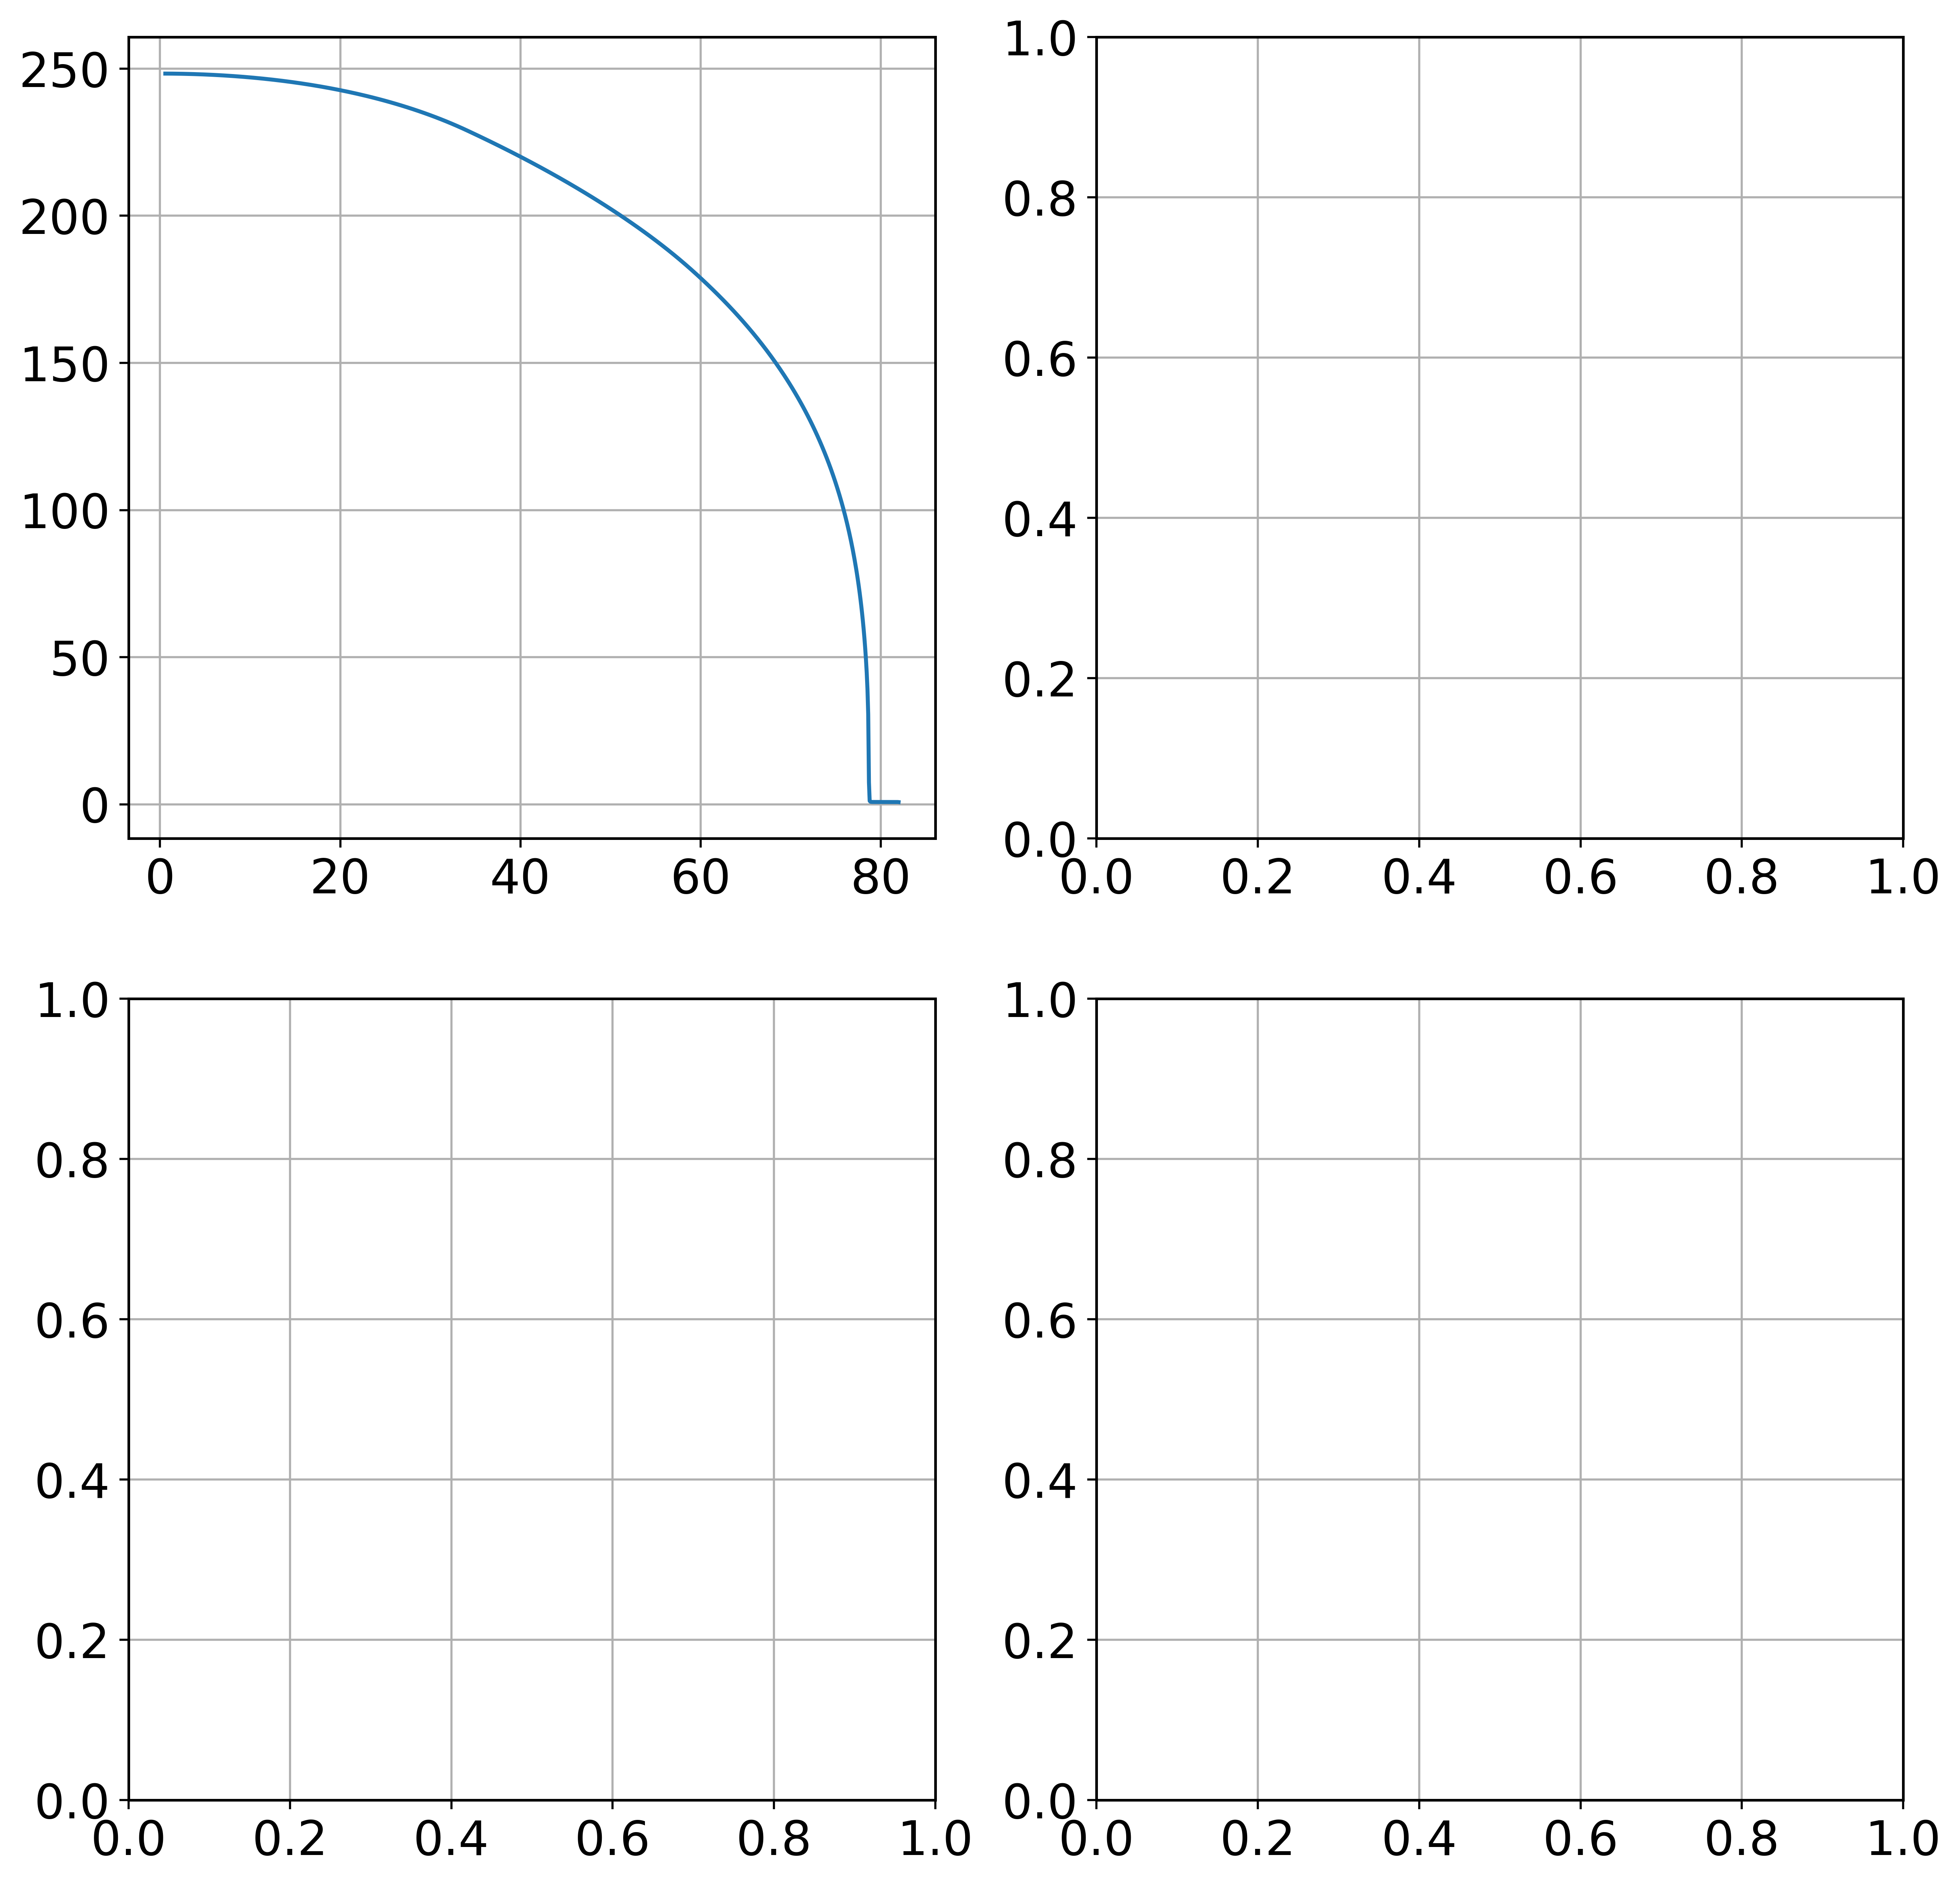

In [12]:
ax = plot_time_slices(tb, variables=['Te', 'Ti', 'ne'], time_slices=(-5, None), save=False)

# Density rise

In [4]:
density_increase_2x = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/transient/time_dependent_density/case_01_2x_base')
density_increase_4x = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/transient/time_dependent_density/case_02_4x_base')
density_increase_12x = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/transient/time_dependent_density/case_05_12x_base')
density_increase_10x = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/transient/time_dependent_density/case_06_10x_base')


In [3]:
density_10x_50_fluence = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/transient/50%_fluence/case_02_125_rise_time_10x_density')

In [2]:
density_100x_25_fluence = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/25%_fluence_test/power_and_density/FL/case_02_100x_density_corrected_this_is_right')

In [6]:
density_80_25_fluence = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/25%_fluence_test/power_and_density/FL/case_03_80x_density')

OSError: No datafiles found matching datapath=/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/25%_fluence_test/power_and_density/FL/case_03_80x_density/BOUT.dmp.*.nc

In [3]:
snb = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/25%_fluence_test/power_and_density/SNB/case_02_corrected_density_100x_density')
snb_80 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/25%_fluence_test/power_and_density/SNB/case_03_80x_density')

In [ ]:
density_rise = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/50%_fluence/power_and_density/FL/case_01_35_times_density')

In [5]:
y = density_rise['y'].values
# Ne_2x = np.squeeze(density_increase_2x['Ne'].values)
# Ne_4x = np.squeeze(density_increase_4x['Ne'].values)
# Ne_10x = np.squeeze(density_increase_10x['Ne'].values)
# Ne_12x = np.squeeze(density_increase_12x['Ne'].values)
# Ne_10x_50_fluence = np.squeeze(density_10x_50_fluence['Ne'].values)
# Ne_100x_25_fluence = np.squeeze(density_rise['Ne'].values)
# # Ne_80_25_fluence = np.squeeze(density_80_25_fluence['Ne'].values)
# Ne_snb = np.squeeze(snb['Ne'].values)
# Ne_snb_80 = np.squeeze(snb_80['Ne'].values)

ne_35 = np.squeeze(density_rise['Ne'].values)

data_set = {'35 times density': ne_35}

for key, value in data_set.items():
    max = np.max(value[:, 0])
    min = np.min(value[:, 0])
    print(f'{key} max: {max}')
    print(f'{key} min: {min}')
    # plt.plot(y, value, label=key)
# print(np.max(Ne))

# max = np.max(Ne[:, 1])

# print(max)


100x max: 1.4217201089398091e+20
100x min: 6.923879495814885e+19
SNB max: 1.9266370722752545e+20
SNB min: 6.795586151187706e+19
SNB_80 max: 1.7192833359218934e+20
SNB_80 min: 6.853481389744455e+19


# Reservoir tests

In [61]:
res_test = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/area_refactor/reservoir_tests/case_03_set_baffle_further')

In [62]:
for var_name, data_array in res_test.data_vars.items():

    print(res_test[var_name])
    # print(f"Dimensions: {data_array.dims}")
    # print(f"Coordinates: {list(data_array.coords)}")
    # print(f"Attributes: {data_array.attrs}")
    print("\n")  # Add a new line for better readability


<xarray.DataArray 'Bxy' (x: 1, y: 400)>
dask.array<concatenate, shape=(1, 400), dtype=float64, chunksize=(1, 10), chunktype=numpy.ndarray>
Coordinates:
    dx       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dy       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dz       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
  * x        (x) int64 0
  * y        (y) float64 0.1945 0.5831 0.9708 1.357 ... 81.92 81.95 81.97 81.99
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    metadata:       {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.51425755...
    options:        IncIntShear = false\t\t# type: bool, source: default\nMXG...
    geometry:       


<xarray.DataArray 'Ed+_iz' (t: 101, x: 1, y: 400, z: 1)>
dask.array<mul, shape=(101, 1, 400, 1), dtype=float64, chunksize=(101, 1, 10, 1), chunktype=numpy.ndarray>
Coordinates:
    dx       (x, y) flo

'Sd+_rec'
'Sd+_iz'

In [10]:
def plot_profiles_animation(simulation_data, variables=['Te'], data_label=None,
                            guard_replace=True, linestyles=None, log_threshold=1e6, filename='profiles_animation.gif',
                            time_slices=(-40, None), step=1, detachment_front=False):
    """
    Creates an animated GIF of the specified variable profiles for a user-specified range of time slices,
    with time plotted in milliseconds. Optionally, plot the detachment front location.

    Parameters:
    simulation_data (xarray Dataset): Dataset for the simulation.
    variables (list): List of variables to plot (e.g., ['Te', 'Ti']).
    data_label (str, optional): Label for the dataset in the plot legend.
    guard_replace (bool): Whether to replace guard cells.
    linestyles (list, optional): Custom linestyles for each variable plot.
    log_threshold (float): Threshold above which the y-axis will be plotted in log scale.
    filename (str): The filename to save the animation as a GIF.
    time_slices (tuple): A tuple specifying the range of time slices to use for the animation (start_slice, end_slice).
                         Defaults to the last 40 time slices.
    step (int): Step interval for sampling time slices to reduce the number of frames.
    detachment_front (bool): If True, plot the detachment front as a horizontal dashed red line.
    """
    # Unpack the start and end of the time slice range
    start_slice, end_slice = time_slices

    # Select the time slices from the dataset with the specified step interval
    selected_steps = simulation_data.isel(t=slice(start_slice, end_slice, step))
    num_timesteps = selected_steps.sizes['t']  # Calculate the number of timesteps in the sampled range
    num_vars = len(variables)

    # Get time values in seconds and convert to milliseconds
    times = selected_steps['t'].values  # Corresponding time values
    # t_conversion = simulation_data['t'].attrs.get('conversion', 1.0)
    times = times * 1e3  # Convert to milliseconds

    # Set up plot layout with two columns, adjusting rows based on the number of variables
    ncols = 2 if num_vars > 1 else 1
    nrows = (num_vars + 1) // 2  # Ensure enough rows

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6 * nrows), dpi=500)
    
    # If we have only one subplot, axs won't be a list, so we ensure it's treated as such
    if num_vars == 1:
        axs = [axs]

    # Flatten axs in case of multiple rows and columns, to handle indexing uniformly
    axs = np.ravel(axs)

    if linestyles is None:
        linestyles = ['-'] * num_vars  # Default linestyle if not provided

    # Precompute y-axis limits
    y_min = {}
    y_max = {}
    for var in variables:
        data_var = selected_steps[var]
        if guard_replace:
            data_var = data_var.isel(y=slice(1, -1))  # Exclude guard cells if needed
        y_min[var] = data_var.min().values
        y_max[var] = data_var.max().values

    # Calculate initial detachment front position for static purple line
    initial_detachment_front = None
    detachment_front_max = None

    if detachment_front:
        # Determine the initial detachment front for the static purple line
        initial_detachment_front = detachment_front_finder(selected_steps.isel(t=0))

        # Calculate the maximum detachment front position over all time steps
        detachment_front_max = max(
            detachment_front_finder(selected_steps.isel(t=t_index)) or 0
            for t_index in range(num_timesteps)
        )

    def update_plot(t_index):
        """Updates the plot for the given time index."""
        current_data = selected_steps.isel(t=t_index)  # Select the time step within the sampled range
        current_time_ms = times[t_index]  # Get the corresponding time in milliseconds

        for i, var in enumerate(variables):
            ax = axs[i]
            ax.clear()  # Clear the previous frame

            y = current_data['y'].values
            var_data = np.ravel(current_data[var].values)

            if guard_replace:
                y = y[1:-1]
                var_data = replace_guards(var_data)

            label = f'{data_label} ({var})'
            ax.plot(y, var_data, label=label, linestyle=linestyles[i])

            # Determine if log scale is needed based on threshold
            if np.max(np.abs(var_data)) > log_threshold:
                scale = "log"
            else:
                scale = "linear"

            # Set the appropriate scale
            ax.set_yscale(scale)
            if scale == "log":
                ax.yaxis.set_major_formatter(log_formatter())  # Apply log formatting

            # Get units
            units = current_data[var].attrs.get('units', 'Unknown units')

            ax.set_xlabel(r'S$_\parallel$ (m)')
            ax.set_ylabel(f'{var} ({units})')
            ax.legend(loc='best', fontsize=8)
            ax.grid(True)
            ax.set_title(f'Time: {current_time_ms:.2f} ms')

            ax.set_ylim(y_min[var], y_max[var])  # Set fixed y-axis limits

            # Set xlim based on maximum detachment front position with a 10% buffer
            if detachment_front and detachment_front_max is not None:
                buffer = detachment_front_max * 0.1
                ax.set_xlim(max(y) - detachment_front_max - buffer, max(y))

                # Plot the static initial detachment front as a purple line
                if initial_detachment_front is not None:
                    ax.axvline(initial_detachment_front, color='purple', linestyle='-', label="Initial Detachment Front")

                # Plot dynamic detachment front as a red dashed line for each frame
                front_loc = detachment_front_finder(current_data)
                if front_loc is not None:
                    ax.axvline(front_loc, color='red', linestyle='--', label=f"Detachment Front: {front_loc:.2f} m")

    # Create animation using FuncAnimation
    ani = animation.FuncAnimation(fig, update_plot, frames=num_timesteps, repeat=False)

    # Save the animation as a GIF using PillowWriter
    ani.save(filename, writer='pillow', fps=10)

    print(f"Animation saved as {filename}")
    plt.close()

4.4393146929928333e+23


(69.0, 82.0)

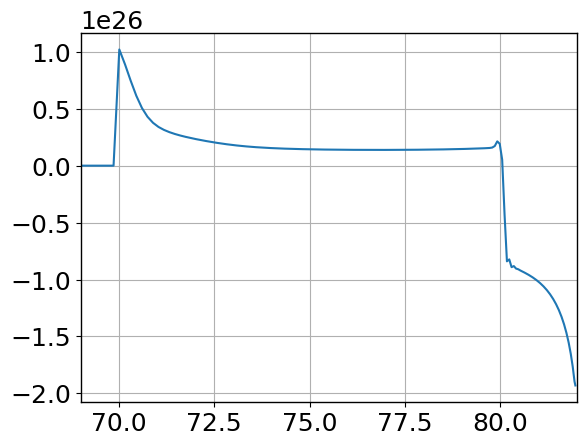

In [25]:
reservoir_terms = ["SNd", "Sd_rsv_div_pfr", "Sd_rsv_div_sol", "Sd_rsv_main_sol", "Sd_src",
        "Sd_target_recycle"]




y = res_test['y'].values[1:-1]
res_area = np.squeeze(res_test['area_d'].values)
res_den = replace_guards(np.squeeze(res_test['Sd_rsv_div_sol'].isel(t=-1).values))


Nd = replace_guards(np.squeeze(res_test['Nd'].isel(t=-1).values))

print(np.max(Nd))

plt.plot(y, res_den)
plt.xlim(69, 82)

## Sum of Sources

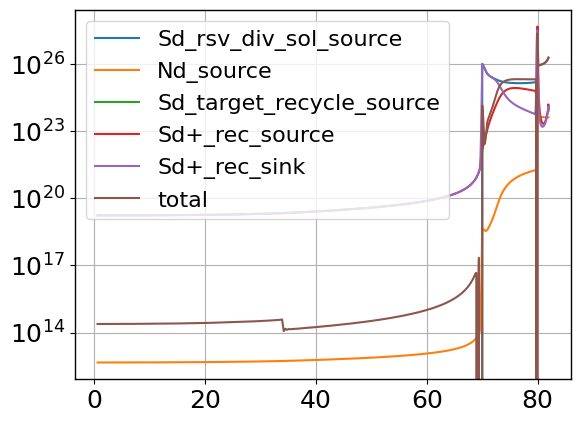

In [78]:
sources = {'reservoir': "Sd_rsv_div_sol", 'Nd': 'Nd', 'recycling': 'Sd_target_recycle', 'recombintion': 'Sd+_rec', 'ionisation': 'Sd+_iz'}

def source_profiles(ds, sources = [''], sinks = [''], time_slice=-1, output_y=False):
    y = ds['y'].values[1:-1]
    total = np.zeros(len(y))
    result = {}
    for source in sources:
        data = np.abs(replace_guards(np.squeeze(ds[source].isel(t=time_slice).values)))
        total = total + data
        result[f'{source}_source'] = data

    for sinks in sinks:
        data = np.abs(replace_guards(np.squeeze(ds[sinks].isel(t=time_slice).values)))
        total = total - data
        result[f'{source}_sink'] = data

    result['total'] = total

    if output_y:
        return total, y
    else:
        return result



def temporal_source_sum(ds, sources = [''], sinks = ['']):

    t = ds['t'].values

    volume_element = ds['dx']*ds['dy']*ds['dz']*ds['J']

    total = 0
    for source in sources:
        data = np.abs(replace_guards(np.squeeze(ds[source].isel(t=-1).values)))
        total = total + data

    for sinks in sinks:
        data = np.abs(replace_guards(np.squeeze(ds[sinks].isel(t=-1).values)))
        total = total - data

    return total


sources = ['Sd_rsv_div_sol', 'Nd', 'Sd_target_recycle', 'Sd+_rec']
sinks = ['Sd+_iz']

total = source_profiles(res_test, sources, sinks)

for key, value in total.items():
    plt.plot(y, value, label=key)

plt.yscale('log')
plt.legend()
# _sum = (ds["Sd_rsv_div_sol"] * ds["dx"]*ds["dy"]*ds["dz"]*ds["J"]).sum()

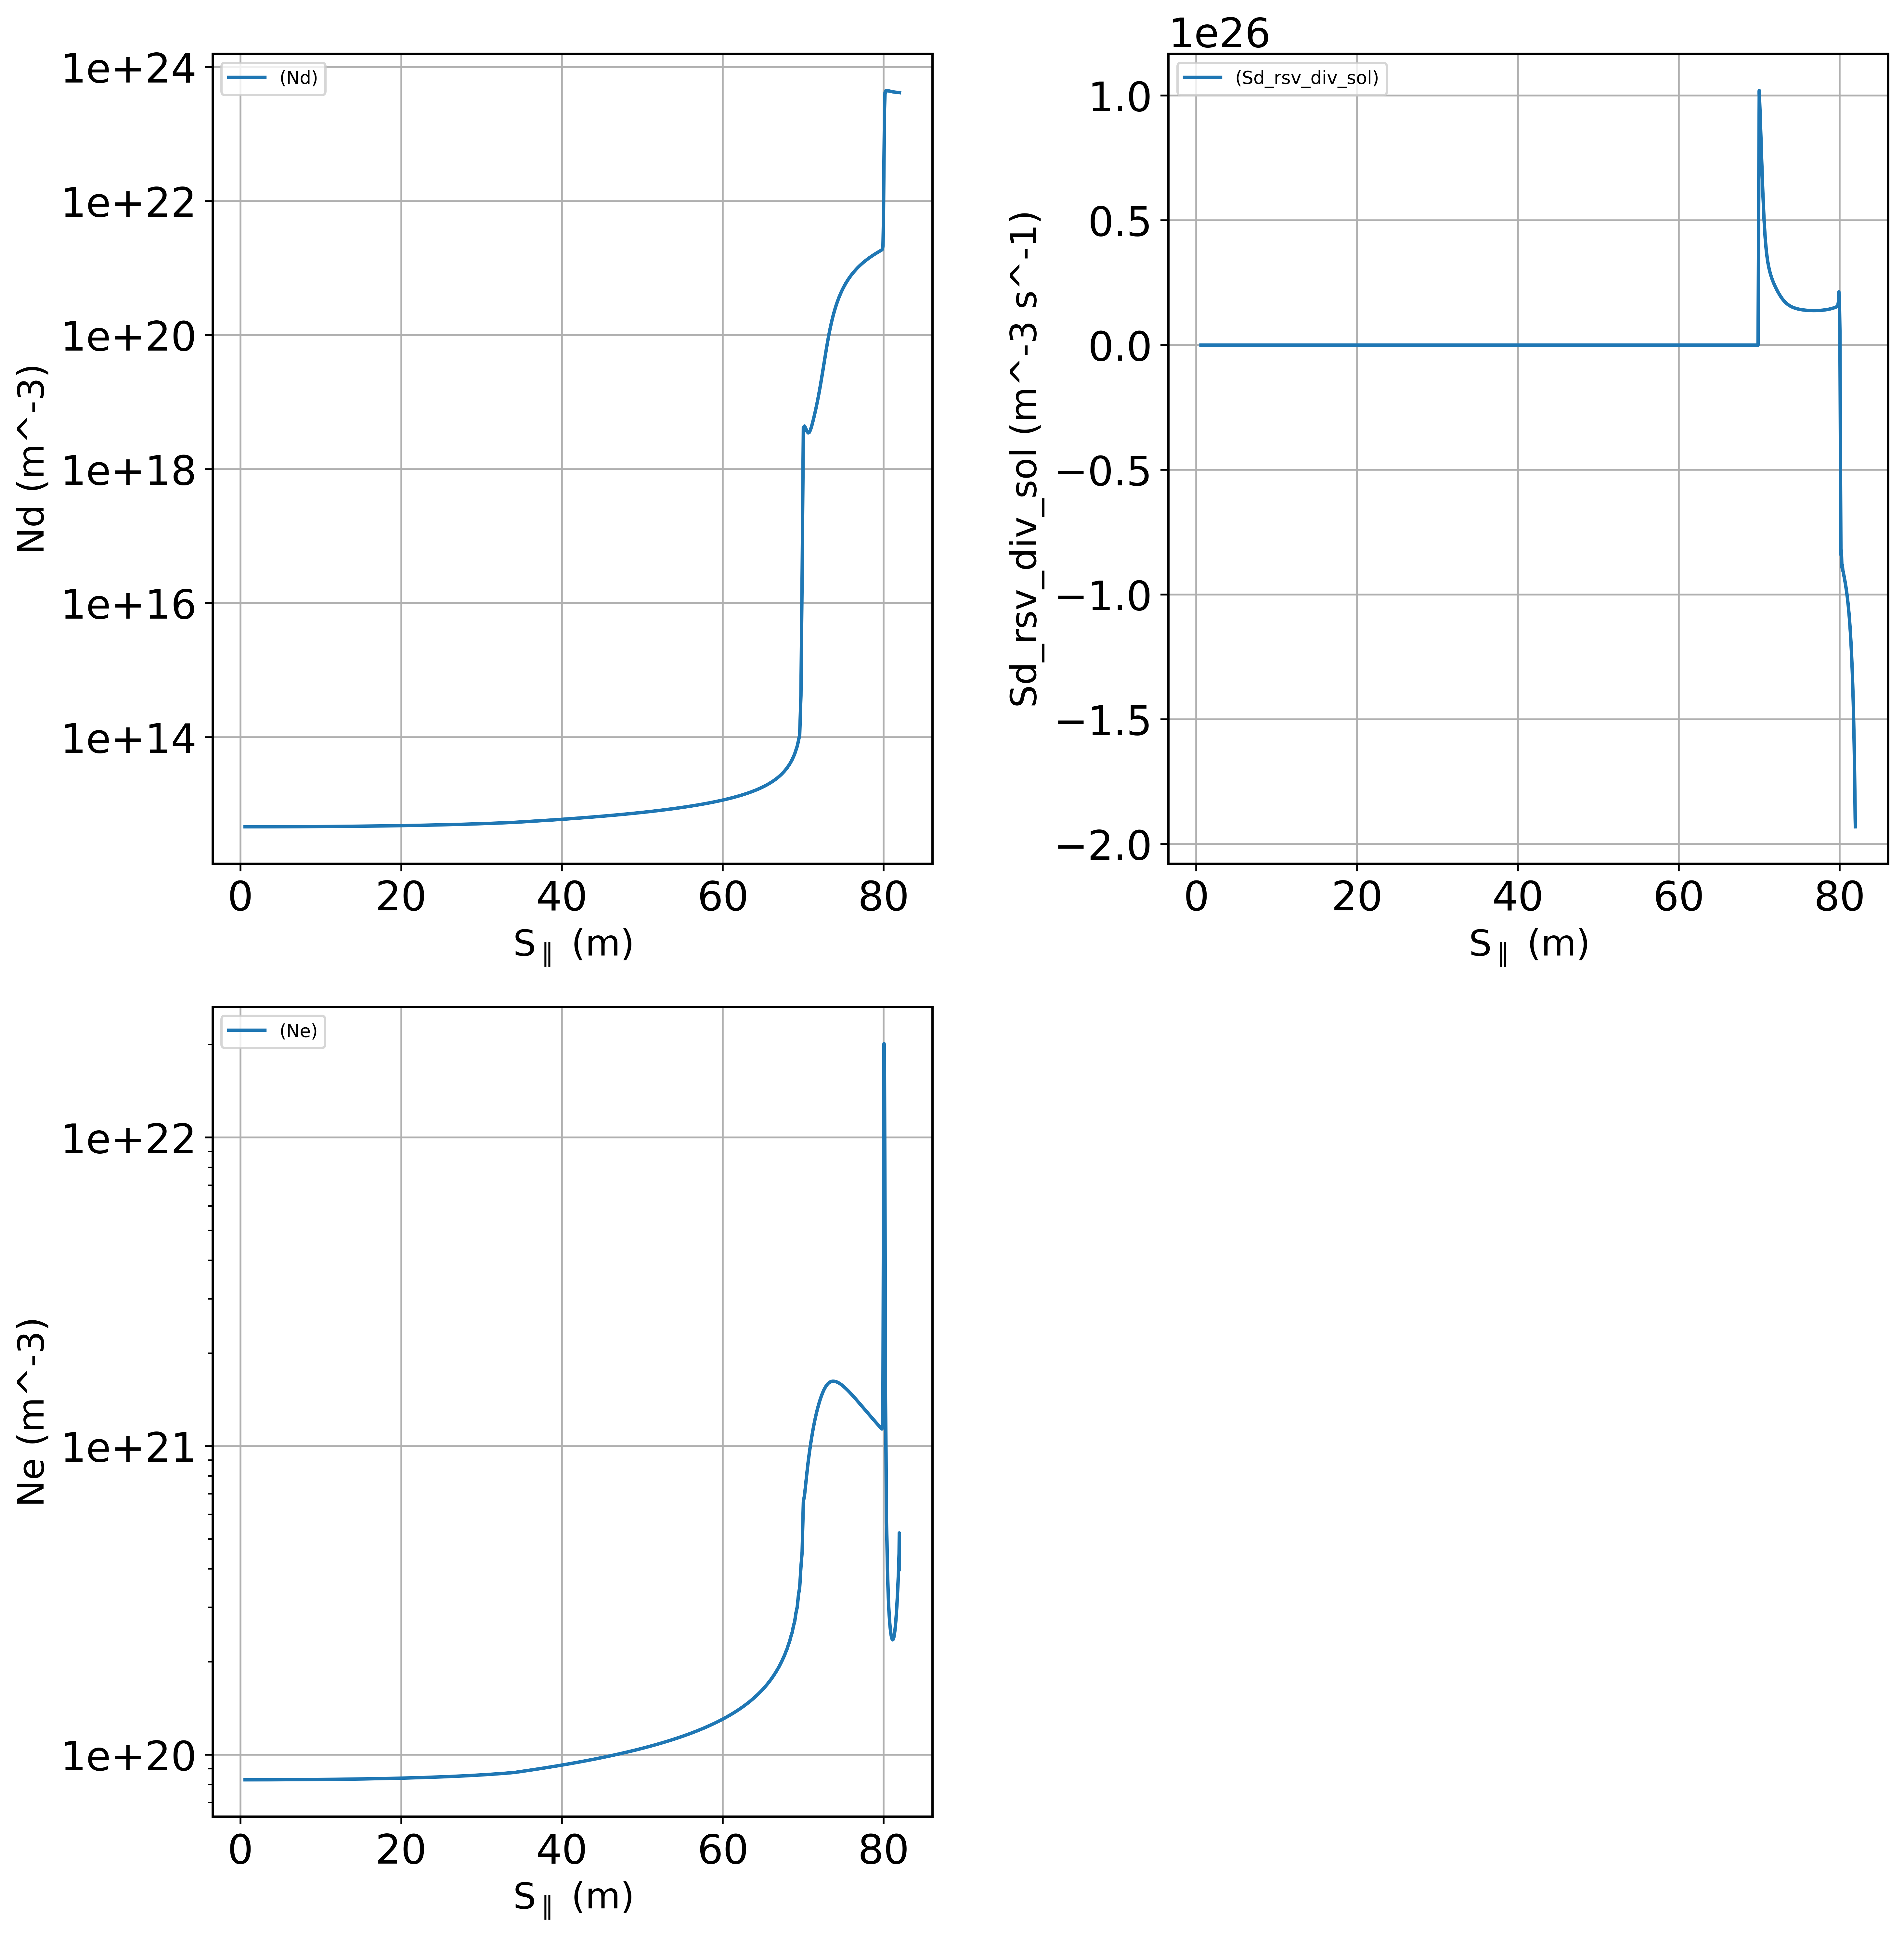

In [29]:
ax = plot_profiles(res_test, variables=['Nd', 'Sd_rsv_div_sol', '', ])

ax[1].set_yscale('linear')



In [14]:
plot_profiles_animation(res_test, variables=['Nd'], time_slices=(-100, None), filename='Nd_animation.gif', detachment_front=False)

Animation saved as Nd_animation.gif


In [15]:
convert_gif_to_mp4('Nd_animation.gif', 'Nd_animation.mp4')

Moviepy - Building video Nd_animation.mp4.
Moviepy - Writing video Nd_animation.mp4



Moviepy - Done !
Moviepy - video ready Nd_animation.mp4


# Rise time


In [4]:
top_hat_2x_4x   = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_8/rise_time/case_04_01_2x_top_hat_4x_duration')
top_hat_4x_2x   = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_8/rise_time/case_05_01_4x_top_hat_2x_duration')

In [12]:
loarte          = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_8/rise_time/case_01')

In [10]:
def q_electron(ds):
    y = ds['y'].values
    t = ds['t'].values # Convert time to milliseconds
    kappa_e = ds['kappa_par_e'].values.reshape(len(t), len(y))
    Te = ds['Te'].values.reshape(len(t), len(y))

    # Apply replace_guards to each time slice
    kappa_e = np.apply_along_axis(replace_guards, axis=1, arr=kappa_e)
    Te = np.apply_along_axis(replace_guards, axis=1, arr=Te)

    # Calculate the gradient of Te along the y-axis
    grad_T = np.gradient(Te, axis=1)
    q = -kappa_e * grad_T

    return q

def heatflux_t_profile(ds, location='target', normalise=False):
    """
    Calculate the heat flux profile at the specified location over time.

    Parameters:
        ds (xarray.Dataset): Dataset containing the relevant data arrays.
        location (str): Location to compute the heat flux ('target', 'xpoint', or 'upstream').
        normalise (bool): If True, normalise the results by the minimum value of the flux.

    Returns:
        list or np.ndarray: Heat flux profile at the specified location.
    """
    t = ds['t'].values * 1e3  # Convert time to milliseconds
    xpoint_location = ds.options['mesh']['length_xpt']
    y = ds['y'].values

    target_flux = []
    xpoint_flux = []

    # Find x-point index based on location
    x_point_index = np.argmin(np.abs(y - xpoint_location))

    # Ensure that kappa_e and Te are reshaped to 2D [time, y]
    kappa_e = ds['kappa_par_e'].values.reshape(len(t), len(y))
    Te = ds['Te'].values.reshape(len(t), len(y))

    # Apply replace_guards to each time slice
    kappa_e = np.apply_along_axis(replace_guards, axis=1, arr=kappa_e)
    Te = np.apply_along_axis(replace_guards, axis=1, arr=Te)

    # Calculate the gradient of Te along the y-axis
    grad_T = np.gradient(Te, axis=1)
    q = -kappa_e * grad_T

    if location == 'target':
        # Collect heat flux at the target (last index along y-axis)
        for indx in range(len(t)):
            target_flux.append(np.sum(q[indx, -20]))

        result = np.array(target_flux)

    elif location == 'xpoint':
        # Collect heat flux at the x-point location
        for indx in range(len(t)):
            xpoint_flux.append(np.sum(q[indx, x_point_index]))

        result = np.array(xpoint_flux)

    elif location == 'upstream':
        # Collect upstream source flux directly without modification
        src = ds['SPe'].values.reshape(len(t), len(y))
        result = src[:, 0]

    else:
        raise ValueError("Invalid location specified. Choose 'target', 'xpoint', or 'upstream'.")

    # Normalise the result if the normalise argument is True
    if normalise:
        result = result / np.min(result)

    return result



    

101


NameError: name 'q_div_ELM_shape' is not defined

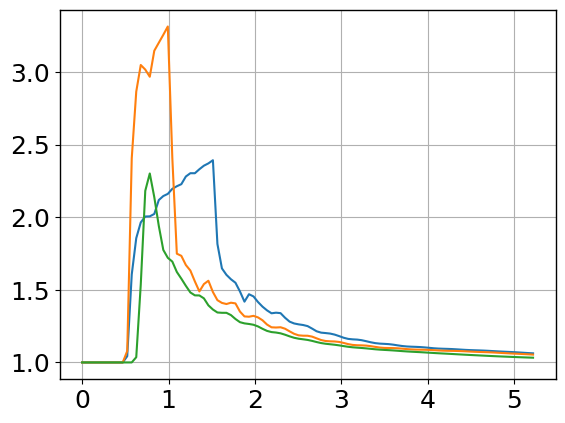

In [20]:
heatflux_2x_4x = heatflux_t_profile(top_hat_2x_4x, location='target', normalise=True)
heatflux_4x_2x = heatflux_t_profile(top_hat_4x_2x, location='target', normalise=True)
heatflux_loarte = heatflux_t_profile(loarte, location='target', normalise=True)
upstream        = heatflux_t_profile(loarte, location='upstream', normalise=True)


pulse_start = 63.05569591723306e-3

t_loarte = loarte['t'].values
pulse_start_index = np.argmin(np.abs(t_loarte - pulse_start))

t_loarte = t_loarte[pulse_start_index:pulse_start_index + len(heatflux_2x_4x)]

print(len(t_loarte))

heatflux_loarte = heatflux_loarte[pulse_start_index:pulse_start_index + len(heatflux_2x_4x)]
upstream_loarte = upstream[pulse_start_index:pulse_start_index + len(heatflux_2x_4x)]

t_2x_4x = top_hat_2x_4x['t'].values * 1e3

t_2x_4x = t_2x_4x - t_2x_4x[0]

t_4x_2x = top_hat_4x_2x['t'].values * 1e3



plt.plot(t_2x_4x, heatflux_2x_4x, label='2x 4x')
plt.plot(t_2x_4x, heatflux_4x_2x, label='4x 2x')
plt.plot(t_2x_4x, heatflux_loarte, label='Loarte')


q_div_ELM_shape(t_2x_4x, tau_rise)

plt.plot(t_2x_4x, upstream_loarte, label='laorte shape')

plt.legend()


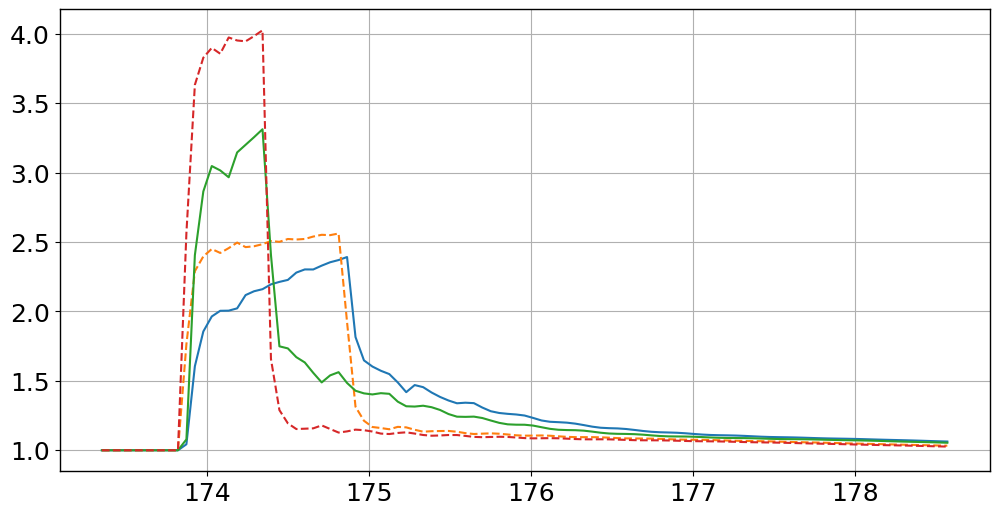

In [26]:
data_set = {'2x_4x': top_hat_2x_4x, '4x_2x': top_hat_4x_2x, 'loarte': loarte}

fig,ax = plt.subplots(1,1, figsize=(12, 6))
t = top_hat_2x_4x['t'].values * 1e3
t_loarte = loarte['t'].values * 1e3
for key, value in data_set.items():
    # t = value['t'].values * 1e3
    q = heatflux_t_profile(value, location='target', normalise=True)
    ax.plot(t, q, label=key)

    q = heatflux_t_profile(value, location='xpoint', normalise=True)
    ax.plot(t, q, label=key, linestyle='--')
    

In [1]:
rise = top_hat_2x_4x
from scipy.integrate import simps, trapz

def f(t, tau_rise,decay = 1):
    tau = tau_rise * 0.8
    epsilon_min             = 1e-9          # Small number to avoid divide by zero in t_current
    sim_start_timestep      = 62.6381085270527e-3          # Un-normalized time of the last time step
    rise_start              = 0.5e-3          # Offset from the sim start time step
    
    t_rise                  = t[0] + rise_start  # Time of the rise midpoint
    # Calculate t_current using BOUT++'s max function
    t_current               = np.maximum(t - t_rise, epsilon_min)  # Time since ELM pulse started

    return (1 + (tau / t_current)**2) * (tau / t_current)**2 * np.exp(-decay*(tau / t_current)**2)

def elm_shape(t, tau_rise,decay = 1):
    """
    Shape of the ELM power profile.

    """
    # epsilon_min             = 1e-9
    # t               = np.maximum(t - t[0], epsilon_min)

    tau = tau_rise * 0.8
    return (1 + (tau / t)**2) * (tau / t)**2 * np.exp(-decay*(tau / t)**2)

def ELM_duration_finder(t, y, threshold_factor=0.01):
    # Ensure inputs are numpy arrays
    t = np.asarray(t)
    y = np.asarray(y)

   
    
    # Find the peak value and its index
    peak_index = np.argmax(y)
    peak_value = y[peak_index]

    # Calculate the threshold (e.g., 1% of the peak value)
    threshold = threshold_factor * peak_value

    # Search for the first index below the threshold AFTER the peak
    indices_below_threshold = np.where(y[peak_index:] <= threshold)[0]

    if len(indices_below_threshold) > 0:
        # Add peak_index to adjust for slicing
        threshold_index = peak_index + indices_below_threshold[0]
        threshold_time = t[threshold_index]
        print(f'threshold_time: {threshold_time} s')
        return threshold_time, threshold_index



def elm_power(t, tau_rise, epsilon_peak_ELM, base_power= 1e9, decay = 1):
    # Define parameters
    epsilon_min             = 1e-9
    t = np.maximum(t - t[0], epsilon_min)
    ELM_shape = elm_shape(t, tau_rise, decay)
    ELM_time, ELM_index = ELM_duration_finder(t, ELM_shape, threshold_factor=0.01)

    # Calculate the integral I over the ELM duration
    I, _ = quad(elm_shape, 1e-9, ELM_time, args=(tau_rise))

    # Calculate q_div,ELM^max
    q_0 = epsilon_peak_ELM / I
    print(f'q_0: {q_0*1e-9} GW/m^2')
    shape = elm_shape(t, tau_rise, decay)

    ELM_power = base_power + ((q_0 * shape)/2)

    prefactor = base_power/base_power * (1 + q_0 * shape/(2*base_power))
    print(f'Max ELM power: {np.max(ELM_power)*1e-9} GW/m^2')
    print(f'Max prefactor: {np.max(prefactor)}')
    return ELM_power, prefactor


tau_rise = 125e-6
t = rise['t'].values
t = np.maximum(t - t[0], 1e-9)
qelm = elm_shape(t, tau_rise)

epsilon_peak_ELM = 15.502379e6 * 0.25  # replace with actual value for epsilon_peak_ELM

for epsilon in [15.502379e6 * 0.25, 15.502379e6 * 0.5, 15.502379e6 * 0.75, 15.502379e6, 15.502379e6 * 1, 15.502379e6 * 1.25, 15.502379e6 * 1.5]:
    print(f'tau_rise = {tau_rise}')
    tau_rise = 80e-6
    ELM_power, prefactor = elm_power(t, tau_rise, epsilon, base_power= 0.4e9)
    plt.plot(t, ELM_power, label=f'epsilon_peak_ELM = {epsilon}')
    print('\n')
    
    # _, threshold_index = ELM_duration_finder(t, ELM_power)
    # print(f'threshold_index: {threshold_index}')
    # plt.axvline(t[threshold_index], linestyle='--', color='black')

plt.legend()
# # plt.plot(t, ELM_power)




NameError: name 'top_hat_2x_4x' is not defined

threshold_time: 0.000626380085270522 s
q_0: 13.253259033681971 GW/m^2
Max ELM power: 19.127733163032747 GW/m^2
Max prefactor: 19.127733163032744
threshold_time: 0.0009917690516783313 s
q_0: 12.618831003731211 GW/m^2
Max ELM power: 7.895121196891855 GW/m^2
Max prefactor: 7.895121196891855
threshold_time: 0.001200562746768496 s
q_0: 12.441252235520787 GW/m^2
Max ELM power: 5.3724592647496 GW/m^2
Max prefactor: 5.372459264749599


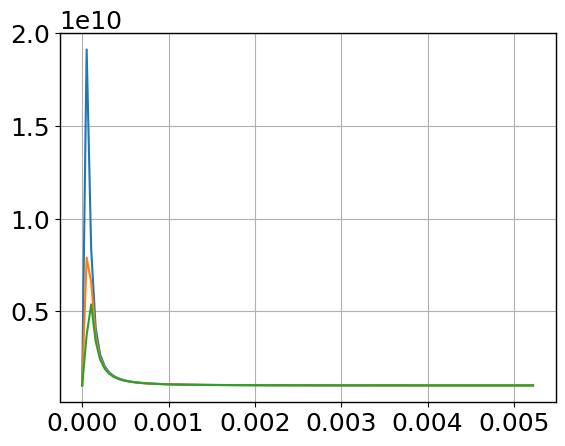

In [56]:
for decay in [0.5,0.75,1]:
    tau_rise = 125e-6
    ELM_power, prefactor = elm_power(t, tau_rise, epsilon_peak_ELM, base_power= 1e9, decay = decay)
    plt.plot(t, ELM_power, label=f'decay = {decay}')

In [ ]:
import numpy as np
from scipy.integrate import simps, trapz

# Example data (replace with actual data)
t = np.linspace(0, 5e-3, 1000)  # Time in seconds
y = 1e9 + 4e9 * np.exp(-t / 1e-3)  # Example profile (replace with actual data)

# Numerical integration using the trapezoidal rule
integral_trapz = np.trapz(y, t)

# Numerical integration using Simpson's rule
integral_simps = simps(y, t)

print(f"Integral using trapezoidal rule: {integral_trapz:.2e} W·s")
print(f"Integral using Simpson's rule: {integral_simps:.2e} W·s")

# Plotting for visualisation
import matplotlib.pyplot as plt
plt.plot(t, y, label="Profile")
plt.fill_between(t, y, alpha=0.3, label="Integrated Area")
plt.xlabel("Time (s)")
plt.ylabel("Profile Value")
plt.legend()
plt.grid()
plt.show()


tau_rise: 80.0 µs, q_0: 18.399 GW/m²
Expected Area: 1.550e+06, Computed Area: 1.550e+06
tau_rise: 125.0 µs, q_0: 11.840 GW/m²
Expected Area: 1.550e+06, Computed Area: 1.550e+06
tau_rise: 250.0 µs, q_0: 6.012 GW/m²
Expected Area: 1.550e+06, Computed Area: 1.550e+06
tau_rise: 500.0 µs, q_0: 3.102 GW/m²
Expected Area: 1.550e+06, Computed Area: 1.550e+06


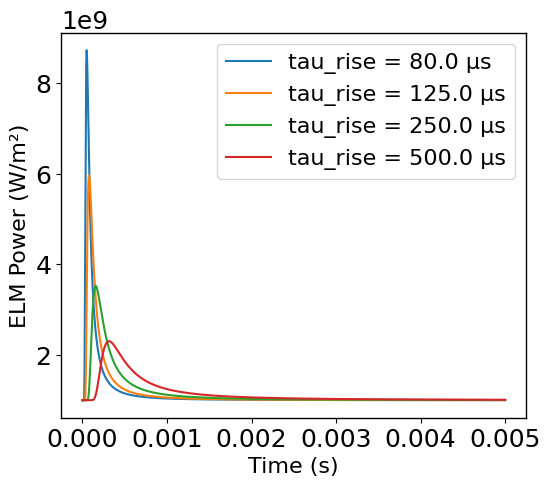

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, simps

# Define the ELM shape function
def elm_shape(t, tau_rise, decay=1):
    tau = tau_rise * 0.8
    return (1 + (tau / t) ** 2) * (tau / t) ** 2 * np.exp(-decay * (tau / t) ** 2)

# ELM power calculation with tests
def elm_power(t, tau_rise, epsilon_peak_ELM, base_power=1e9, decay=1):
    epsilon_min = 1e-9
    t = np.maximum(t - t[0], epsilon_min)

    # Integrate the shape over the duration to normalise q_0
    def integrand(t): return elm_shape(t, tau_rise, decay)
    tau_ELM = t[-1]  # Assume the entire duration is used
    I, _ = quad(integrand, 1e-9, tau_ELM)

    # Normalise q_0 so the total area matches epsilon_peak_ELM
    q_0 = epsilon_peak_ELM / I

    # Compute the ELM shape and power
    shape = elm_shape(t, tau_rise, decay)
    ELM_power = base_power + ((q_0 * shape) / 2)
    prefactor = 1 + q_0 * shape / (2 * base_power)

    # Numerical integration of q_0 * shape to verify area
    area_computed = simps(q_0 * shape, t)
    print(f"tau_rise: {tau_rise*1e6:.1f} µs, q_0: {q_0*1e-9:.3f} GW/m²")
    print(f"Expected Area: {epsilon_peak_ELM:.3e}, Computed Area: {area_computed:.3e}")

    # Test: Check if the computed area matches epsilon_peak_ELM
    assert np.isclose(area_computed, epsilon_peak_ELM, rtol=1e-3), \
        f"Computed area ({area_computed:.3e}) does not match epsilon_peak_ELM ({epsilon_peak_ELM:.3e})!"

    return ELM_power, prefactor

# Example usage
epsilon_peak_ELM = 15.502379e6 * 0.1  # Example epsilon_peak_ELM
t = np.linspace(1e-9, 5e-3, 1000)  # Time array (in seconds)

# Plot ELM power profiles for different tau_rise values
plt.figure(figsize=(6, 5))
for tau_rise in [80e-6, 125e-6, 250e-6, 500e-6]:
    ELM_power, prefactor = elm_power(t, tau_rise, epsilon_peak_ELM, base_power=1e9)
    plt.plot(t, ELM_power, label=f'tau_rise = {tau_rise*1e6:.1f} µs')

plt.xlabel("Time (s)")
plt.ylabel("ELM Power (W/m²)")
plt.legend()
plt.grid()
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, simps

# Polynomial pulse with specified peak
def polynomial_pulse_with_peak(t, ELM_start, tau_rise, pulse_duration, prefactor_peak):
    """
    Symmetric polynomial pulse with a specified peak prefactor.

    Parameters:
    - t: Time array
    - ELM_start: Start time of the pulse (s)
    - tau_rise: Rise time (s)
    - pulse_duration: Total pulse duration (s)
    - prefactor_peak: Desired peak value of the prefactor

    Returns:
    - Pulse profile as an array
    """
    # Centre of the pulse
    pulse_center = ELM_start + pulse_duration / 2
    half_duration = pulse_duration / 2

    # Normalized time variable
    x = np.abs(t - pulse_center) / half_duration
    x = np.clip(x, 0, 1)  # Clamp x between [0, 1]

    # Cubic smooth-step function
    smooth_step = 3 * x**2 - 2 * x**3

    # Scale smooth_step to achieve the desired peak prefactor
    return 1 + (prefactor_peak - 1) * (1 - smooth_step)

# ELM power calculation with normalisation
def elm_power(t, tau_rise, epsilon_peak_ELM, base_power=1e9, prefactor_peak=5.0):
    ELM_start = t[0]
    pulse_duration = 3 * tau_rise  # Total pulse duration is proportional to tau_rise

    # Define the pulse shape
    shape = polynomial_pulse_with_peak(t, ELM_start, tau_rise, pulse_duration, prefactor_peak)

    # Integrate the shape over the duration to normalise q_0
    def integrand(t): return polynomial_pulse_with_peak(t, ELM_start, tau_rise, pulse_duration, prefactor_peak)
    I, _ = quad(integrand, ELM_start, ELM_start + pulse_duration)

    # Normalise q_0 so the total area matches epsilon_peak_ELM
    q_0 = epsilon_peak_ELM / I

    # Compute ELM power
    ELM_power = base_power + ((q_0 * shape) / 2)
    prefactor = 1 + q_0 * shape / (2 * base_power)

    # Numerical integration of q_0 * shape to verify area
    area_computed = simps(q_0 * shape, t)
    print(f"tau_rise: {tau_rise*1e6:.1f} µs, q_0: {q_0*1e-9:.3f} GW/m²")
    print(f"Expected Area: {epsilon_peak_ELM:.3e}, Computed Area: {area_computed:.3e}")

    # Test: Check if the computed area matches epsilon_peak_ELM
    assert np.isclose(area_computed, epsilon_peak_ELM, rtol=1e-3), \
        f"Computed area ({area_computed:.3e}) does not match epsilon_peak_ELM ({epsilon_peak_ELM:.3e})!"

    return ELM_power, prefactor

# Example usage
epsilon_peak_ELM = 15.502379e6 * 0.5  # Example epsilon_peak_ELM
t = np.linspace(0, 5e-3, 1000)  # Time array (in seconds)

# Plot ELM power profiles for different tau_rise values
plt.figure(figsize=(6, 5))
for tau_rise in [80e-6, 125e-6, 250e-6, 500e-6]:
    ELM_power, prefactor = elm_power(t, tau_rise, epsilon_peak_ELM, base_power=1e9, prefactor_peak=5.0)
    plt.plot(t, ELM_power, label=f'tau_rise = {tau_rise*1e6:.1f} µs')

plt.xlabel("Time (s)")
plt.ylabel("ELM Power (W/m²)")
plt.legend()
plt.grid()
plt.show()


tau_rise: 80.0 µs, q_0: 10.766 GW/m²
Expected Area: 7.751e+06, Computed Area: 5.900e+07


AssertionError: Computed area (5.900e+07) does not match epsilon_peak_ELM (7.751e+06)!

<Figure size 600x500 with 0 Axes>

### Loarte rise time

In [8]:
loarte_80 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_01_rise_time_80_ion_viscosity')
loarte_125 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_02_rise_time_125_ion_viscosity')

tau_rise = 8e-05
threshold_time: 0.0007307779328156044 s
q_0: 48.766284801868046 GW/m^2
Max ELM power: 20.806723958032048 GW/m^2
Max prefactor: 52.016809895080115


tau_rise = 0.000125
threshold_time: 0.0012005637467685099 s
q_0: 31.103128857035447 GW/m^2
Max ELM power: 11.33103008144973 GW/m^2
Max prefactor: 28.327575203624324




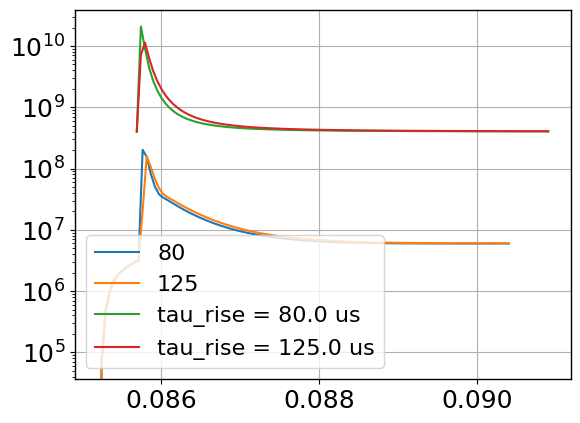

In [18]:
data_set = {'80': loarte_80, '125': loarte_125}

# for key, value in data_set.items():
#     t = value['t'].values
#     heatflux = heatflux_t_profile(value, location='target', normalise=False)
#     heatflux -= np.min(heatflux)
#     plt.plot(t, heatflux, label=key)

for tau_rise in [80e-6 ,125e-6]:
    print(f'tau_rise = {tau_rise}')
    ELM_power, prefactor = elm_power(t, tau_rise, epsilon_peak_ELM, base_power= 0.4e9)
    plt.plot(t + 0.5e-3, ELM_power, label=f'tau_rise = {tau_rise*1e6} us')
    print('\n')

# _, threshold_index = ELM_duration_finder(t, ELM_power)
# print(f'threshold_index: {threshold_index}')
# plt.axvline(t[threshold_index], linestyle='--', color='black')

plt.legend()
plt.yscale('log')


In [203]:
heatflux_125 = heatflux_t_profile(rise_125, location='xpoint', normalise=False)
heatflux_6525 = heatflux_t_profile(rise_6525, location='xpoint', normalise=False)
upstream_125 = heatflux_t_profile(rise_125, location='upstream', normalise=False)
upstream_6525 = heatflux_t_profile(rise_6525, location='upstream', normalise=False)


print(np.min(heatflux_125*1e-9))


heatflux_125 = heatflux_125 - np.min(heatflux_125)
heatflux_6525 = heatflux_6525 - np.min(heatflux_6525)
upstream_125 = upstream_125 - np.min(upstream_125)
upstream_6525 = upstream_6525 - np.min(upstream_6525)

# heatflux_125 = heatflux_125 - 1e-9
# heatflux_6525 = heatflux_6525 - 1e-9

t_125 = rise_125['t'].values * 1e3  # Convert time to milliseconds
t_125 = t_125 - t_125[0]
t_6525 = rise_6525['t'].values * 1e3  # Convert time to milliseconds
t_6525 = t_6525 - t_6525[0]

0.1279830033462616


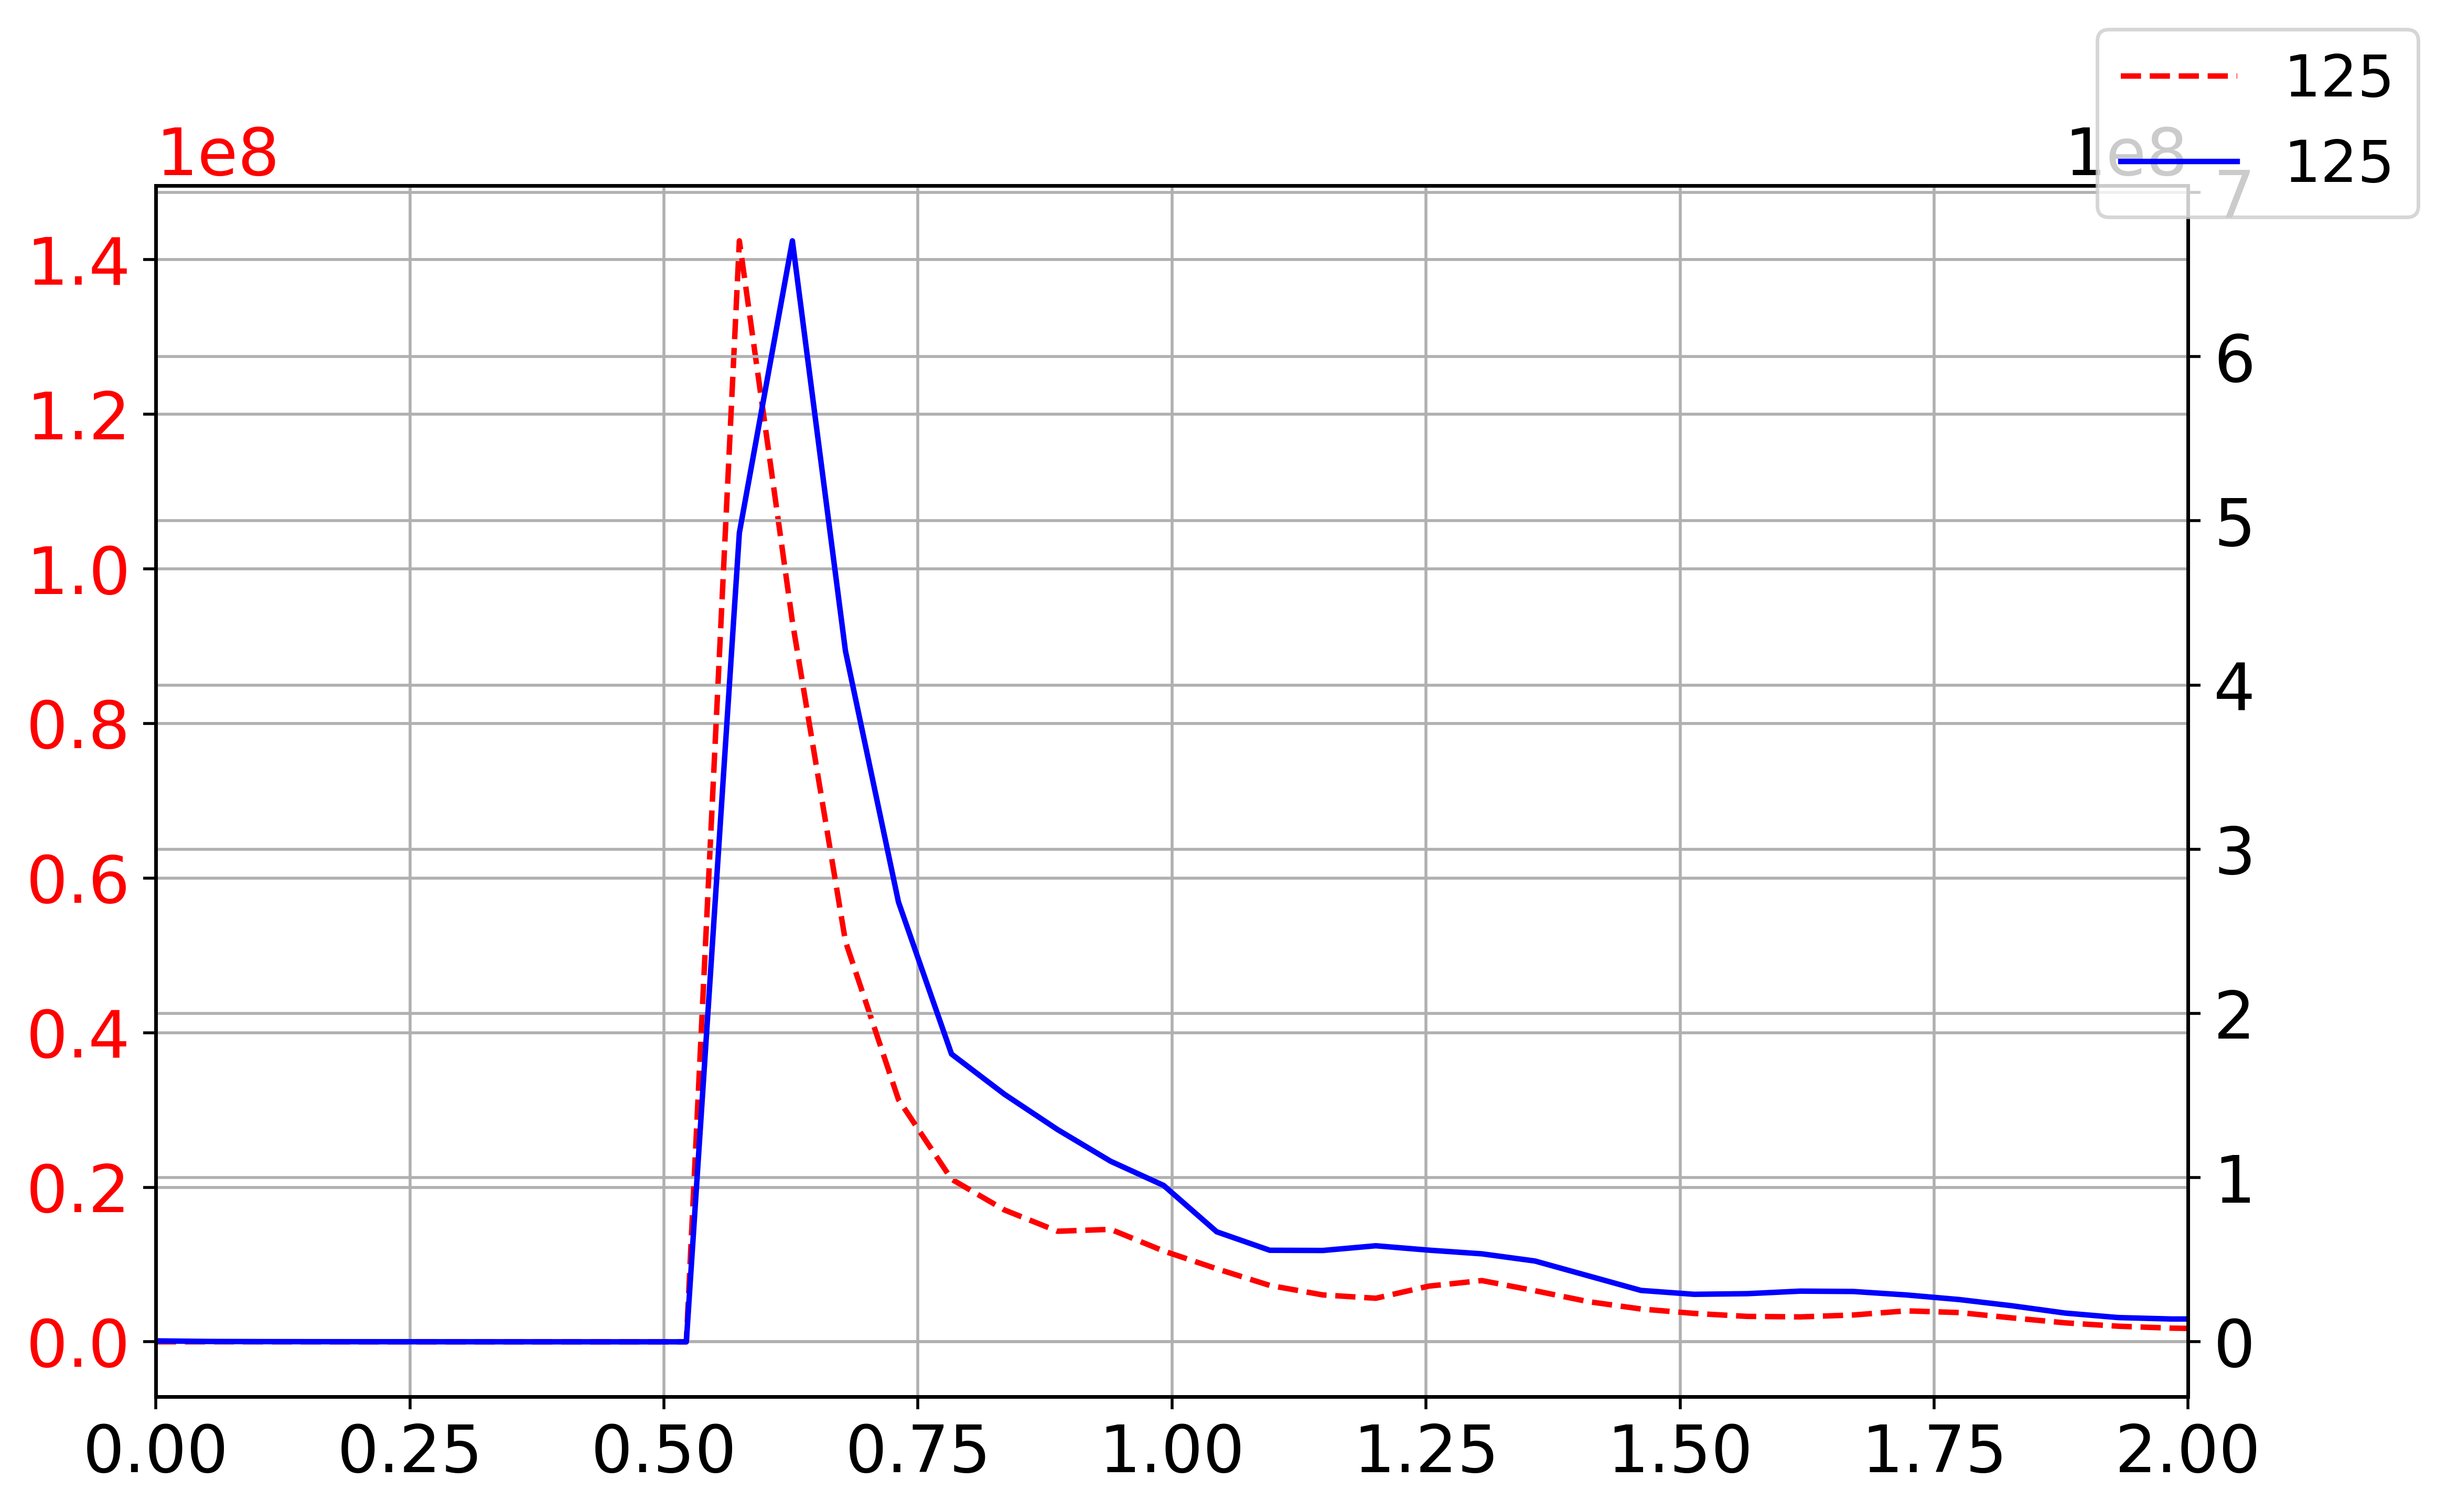

In [255]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=500)
ax2 = ax.twinx()

ax2.plot(t_125, heatflux_125, color = 'blue' , label = '125')
ax.plot(t_125, upstream_125, color = 'red' , linestyle = '--', label = '125')


# ax2.plot(t_6525, heatflux_6525, color = 'red', label = '62.5')
# ax2.plot(t_6525, upstream_6525, color = 'red', linestyle = '--', label = '62.5')

fig.legend()
ax.set_xbound(0,2)
ax.tick_params(axis="y", labelcolor="red")

# plt.yscale('log')

In [87]:
# Check both have the same area (although it doesn't look like they do)

from scipy.integrate import simps

area_125 = simps(heatflux_125, t_125)   
area_6525 = simps(heatflux_6525, t_6525)

print(f'{area_125*1e-6} MJ/m^2 , {area_6525*1e-6} MJ/m^2')


178.59594097560273 MJ/m^2 , 178.14308447727043 MJ/m^2


## calculating source


In [8]:
rise = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_8/rise_time/case_01')

q_div_ELM_max (GW) = 14.586299634182394


Text(0, 0.5, '$\\frac{q_{\\parallel,\\text{ELM}}(t)}{q_{\\parallel,\\text{ELM}}^{0}}$')

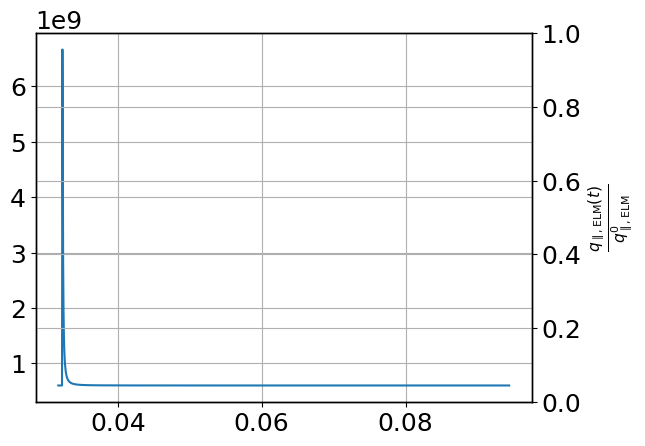

In [16]:
import numpy as np
from scipy.integrate import quad


# Define the function for q_div,ELM(t) without q_div,ELM^max
def q_div_ELM_shape(t, tau_rise):
    tau = tau_rise * 0.8
    return (1 + (tau / t)**2) * (tau / t)**2 * np.exp(-(tau / t)**2)

def f(t, tau_rise,decay = 1):
    tau = tau_rise * 0.8
    epsilon_min             = 1e-9          # Small number to avoid divide by zero in t_current
    sim_start_timestep      = 62.6381085270527e-3          # Un-normalized time of the last time step
    rise_start              = 0.5e-3          # Offset from the sim start time step
    t_rise                  = t[0] + rise_start  # Time of the rise midpoint

    # Calculate t_current using BOUT++'s max function
    t_current               = np.maximum(t - t_rise, epsilon_min)  # Time since ELM pulse started

    return (1 + (tau / t_current)**2) * (tau / t_current)**2 * np.exp(-decay*(tau / t_current)**2)


decay = 1.0
# t = np.linspace(0, 8*tau_rise, 1000)
t = rise['t']
# Define parameters
epsilon_peak_ELM = 15.502379e6 * 0.1  # replace with actual value for epsilon_peak_ELM
tau_rise = 125e-6
tau_ELM = 3 * tau_rise  # replace with actual value for tau_ELM
base_power = 0.6e9

# Calculate the integral I over the ELM duration
I, _ = quad(q_div_ELM_shape, 1e-9, tau_ELM, args=(tau_rise))

# Calculate q_div,ELM^max
q_div_ELM_max = epsilon_peak_ELM / I

power = f(t, tau_rise, decay = 1)

print(f"q_div_ELM_max (GW) = {q_div_ELM_max * 1e-9}")

ELM_power = base_power + ((q_div_ELM_max * power)/2)

prefactor = base_power/base_power * (1 + q_div_ELM_max * power/(2*base_power))



fig, ax = plt.subplots()
ax2 = ax.twinx()



ax.plot(t, ELM_power, label='Source power')
# ax.plot(t, heatflux, label='Target heat flux', color='red')

# plt.plot(t, prefactor)
# plt.plot(t, ELM_power)
# plt.plot(((t-t[0])*1e3) - 0.5, power)
# plt.plot(t, power)
plt.xlabel(r'$t-t_{ELM}$ (ms)')
plt.ylabel(r'$\frac{q_{\parallel,\text{ELM}}(t)}{q_{\parallel,\text{ELM}}^{0}}$')
# plt.ylim(0,5)

# plt.plot(t, heatflux)


In [11]:
import numpy as np
from scipy.integrate import quad


# Define the function for q_div,ELM(t) without q_div,ELM^max
def q_div_ELM_shape(t, tau_rise):
    """
    Shape of the ELM power profile.
    """
    tau = tau_rise * 0.8
    return (1 + (tau / t)**2) * (tau / t)**2 * np.exp(-(tau / t)**2)

def calculate_ELM_magnitude(epsilon_peak_ELM, tau_rise):
    """
    Calculate the magnitude of q_div_ELM^max.

    Parameters:
    epsilon_peak_ELM (float): Total energy fluence of the ELM.
    tau_rise (float): Rise time of the ELM.

    Returns:
    float: q_div_ELM^max.
    """
    tau_ELM = 5 * tau_rise  # Total ELM duration

    # Integrate the ELM shape function to calculate the normalisation factor
    I, _ = quad(q_div_ELM_shape, 1e-9, tau_ELM, args=(tau_rise,))
    q_div_ELM_max = epsilon_peak_ELM / I

    print(f'Check: epsilon_peak_ELM = {epsilon_peak_ELM*1e-6} MJ/m^2 = {(q_div_ELM_max * I)*1e-6} MJ/m^2')

    return q_div_ELM_max

def f_ELM_profile(t, tau_rise, decay=1.0):
    """
    Calculate the ELM power profile as a function of time.

    Parameters:
    t (array-like): Time points for the calculation.
    tau_rise (float): Rise time of the ELM.
    decay (float): Exponential decay factor.

    Returns:
    array-like: ELM power profile.
    """
    tau = tau_rise * 0.8
    epsilon_min = 1e-9  # Small number to avoid divide-by-zero
    rise_start = 0.5e-3  # Offset from the simulation start time
    t_rise = t[0] + rise_start  # Time of the rise midpoint

    t_current = np.maximum(t - t_rise, epsilon_min)  # Time since ELM pulse started

    return (1 + (tau / t_current)**2) * (tau / t_current)**2 * np.exp(-decay * (tau / t_current)**2)

def calculate_base_power_prefactor(base_power, q_div_ELM_max, t, tau_rise, decay=1.0):
    """
    Calculate the base power prefactor for the ELM.

    Parameters:
    base_power (float): Base power in the simulation.
    q_div_ELM_max (float): Magnitude of the ELM power.
    t (array-like): Time points for the calculation.
    tau_rise (float): Rise time of the ELM.
    decay (float): Exponential decay factor.

    Returns:
    array-like: Prefactor for the base power.
    """
    power = f_ELM_profile(t, tau_rise, decay=decay)

    # Calculate ELM power and prefactor
    ELM_power = base_power + ((q_div_ELM_max * power) / 2)
    prefactor = base_power / base_power * (1 + q_div_ELM_max * power / (2 * base_power))

    return prefactor


Check: epsilon_peak_ELM = 1.5502379000000002 MJ/m^2 = 1.5502379000000002 MJ/m^2
q_div_ELM_max (GW) = 13.257253207972184
0


NameError: name 'area' is not defined

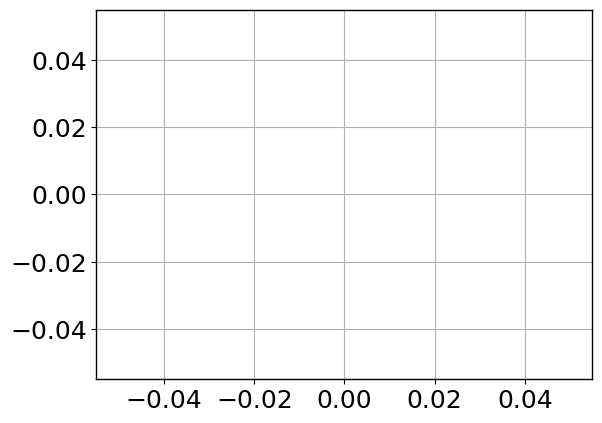

In [14]:
# Define parameters

rise = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_8/rise_time/case_01')





Check: epsilon_peak_ELM = 7.7511895 MJ/m^2 = 7.7511895 MJ/m^2
q_div_ELM_max (GW) = 66.28626603986092
0


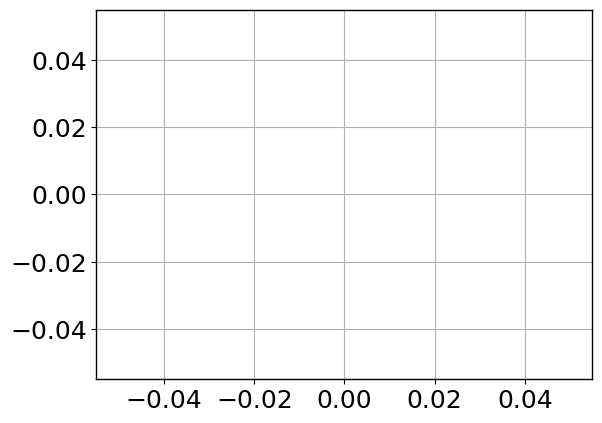

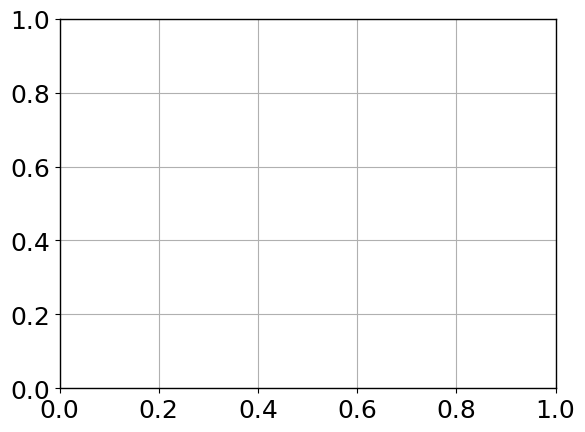

In [19]:
t = rise['t'].values
epsilon_peak_ELM = 15.502379e6 * 0.50  # Energy fluence in J/m^2
tau_rise = 125e-6  # Rise time in seconds
base_power = 1e9  # Base power in W

# Calculate q_div_ELM^max
q_div_ELM_max = calculate_ELM_magnitude(epsilon_peak_ELM, tau_rise)
print(f"q_div_ELM_max (GW) = {q_div_ELM_max * 1e-9}")

# Calculate the base power prefactor
prefactor = calculate_base_power_prefactor(base_power, q_div_ELM_max, t, tau_rise, decay=1.0)

ELM_power = base_power + ((q_div_ELM_max * f_ELM_profile(t, tau_rise, decay=1.0)) / 2)

elm_profile = f_ELM_profile(t, tau_rise, decay=1.0)


only_ELM = q_div_ELM_max * elm_profile


t = (t - t[0]) + 0.5e-3

index_t_ELM = np.argmin(np.abs(t - 3 * tau_rise))

print(index_t_ELM)

t = t[: index_t_ELM]
only_ELM = only_ELM[: index_t_ELM] 

plt.plot(t, only_ELM)

# print(t)
# only_ELM = only_ELM[: np.argmin(np.abs(t - 3*tau_rise))]
# plt.plot(t, only_ELM)
# area = simps(only_ELM, t)


# print(f"Area under the ELM power profile: {area * 1e-6} MJ/m^2")

# Print or plot the results
# t = (t - t[0])
fig,ax = plt.subplots()
# ax2 = ax.twinx()
# ax.plot(t, prefactor)
# ax2.plot(t, ELM_power)
# ax.plot(t, only_ELM)
# ax.plot(t, ELM_power)

In [3]:
rise_old = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_8/rise_time/case_05_01_4x_top_hat_2x_duration')

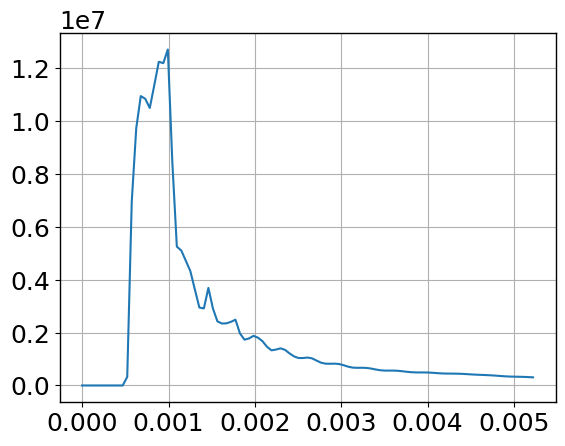

In [5]:
import numpy as np

def replace_guards(var):
    """
    Replace the points in the guard cells with boundary values.
    """
    if len(var) <= 2:
        return var  # Return as-is if there are insufficient points to replace

    var = var[1:-1]  # Strip the edge guard cells

    var[0] = 0.5 * (var[0] + var[1])
    var[-1] = 0.5 * (var[-1] + var[-2])
    
    return var

def heatflux_t_profile(ds, location='target'):
    t = ds['t'].values  # Convert time to milliseconds
    xpoint_location = ds.options['mesh']['length_xpt']
    y = ds['y'].values

    target_flux = []
    xpoint_flux = []

    # Find x-point index based on location
    x_point_index = np.argmin(np.abs(y - xpoint_location))

    # Ensure that kappa_e and Te are reshaped to 2D [time, y]
    kappa_e = ds['kappa_par_e'].values.reshape(len(t), len(y))
    Te = ds['Te'].values.reshape(len(t), len(y))

    # Apply replace_guards to each time slice
    kappa_e = np.apply_along_axis(replace_guards, axis=1, arr=kappa_e)
    Te = np.apply_along_axis(replace_guards, axis=1, arr=Te)

    # Calculate the gradient of Te along the y-axis
    grad_T = np.gradient(Te, axis=1)
    q = -kappa_e * grad_T

    if location == 'target':
        # Collect heat flux at the target (last index along y-axis)
        for indx in range(len(t)):
            target_flux.append(np.sum(q[indx, -1]))

        return target_flux

    elif location == 'xpoint':
        # Collect heat flux at the x-point location
        for indx in range(len(t)):
            xpoint_flux.append(np.sum(q[indx, x_point_index]))

        return xpoint_flux

    elif location == 'upstream':
        # Collect upstream source flux directly without modification
        src = ds['SPe'].values.reshape(len(t), len(y))
        src_upstream = src[:, 0]
        print(src_upstream)

        return src_upstream

    else:
        raise ValueError("Invalid location specified. Choose 'target', 'xpoint', or 'upstream'.")

# Example usage (requires `rise` dataset as input):
# target_flux = heatflux_t_profile(rise, location='target')





sim_start_timestep      = 63.05569591723306e-3          # Un-normalized time of the last time step
rise_start              = 0.5e-3
tau_rise                = 250e-6
tau_ELM                 = 20 * tau_rise

pulse_start = sim_start_timestep + rise_start  # Time of the rise midpoint  
t_old = rise_old['t'].values

pulse_start_index = np.argmin(np.abs(t_old - pulse_start))
pulse_end_index = np.argmin(np.abs(t_old - (pulse_start + tau_ELM)))

heatflux = heatflux_t_profile(rise_old, location='target') 

# peak = np.max(heatflux)
# # Step 2: Calculate 1% of the peak value
# threshold = 0.01 * peak

# # Step 3: Find the index where y_data falls below the threshold
# truncate_index = np.where(heatflux < threshold)[0][0]  # First index below threshold


t_old = t_old[pulse_start_index:]

t_old = (t_old - t_old[0])

heatflux = heatflux - np.min(heatflux)
heatflux = heatflux[pulse_start_index:]


# Step 4: Truncate the data
# x_truncated = t_old[:truncate_index + 1]
# y_truncated = heatflux[:truncate_index + 1]

plt.plot(t_old, heatflux)


# t_old = (t - t[0])

df = pd.DataFrame({'t': t_old, 'heatflux': heatflux})
df.to_csv('ELM_heatflux_to_hat.csv')

# plt.plot(t_old, heatflux)
# plt.plot(x_truncated, y_truncated, 'ro')



# print(rise.options['mesh']['length_xpt'])